In [1]:
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [2]:
directory = 'C:/Users/leand/Documents/LEANDRO/UBA/CEIA/III/CV/CV_TPS/TP3/images/'
template = cv.imread('C:\\Users\\leand\\Documents\\LEANDRO\\UBA\\CEIA\\III\\CV\\CV_TPS\\TP3\\pattern.png',0)
img_list = []

# Lista todos los archivos en el directorio
files = os.listdir(directory)

for file in files:
    img = cv.imread(directory + file)
    img_list.append(img)

In [3]:
def blurImg(images):
    img_list=[]
    for img in images:
        img_list.append(cv.blur(img,(3,3)))
    return img_list

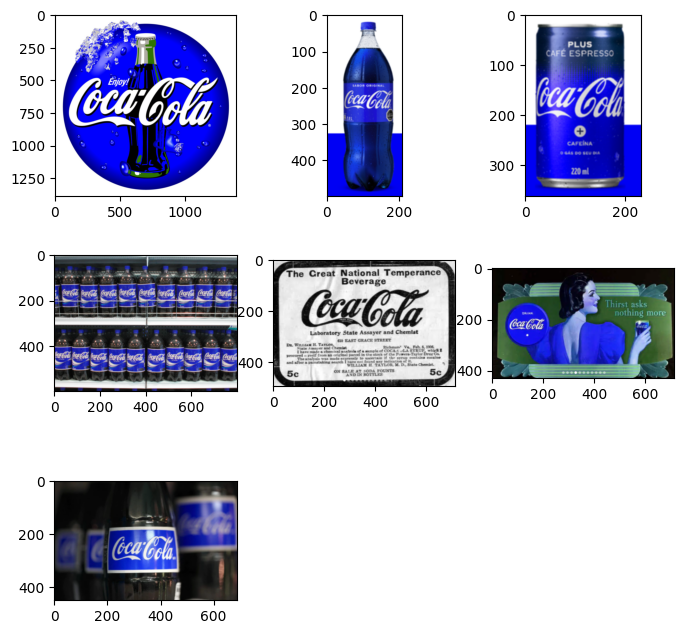

In [4]:
img_list_blur = blurImg(img_list)

# Crea una figura de tamaño 8x8 pulgadas
fig = plt.figure(figsize=(8, 8))

# Calcula el número de filas y columnas necesarias
num_imagenes = len(img_list_blur)
num_filas = int(num_imagenes ** 0.5) + 1
num_columnas = int(num_imagenes ** 0.5) + 1

# Crea subtramas para cada imagen en la lista
for i in range(num_imagenes):
    sub = fig.add_subplot(num_filas, num_columnas, i+1)
    sub.imshow(img_list_blur[i], cmap='gray')

# Muestra el plot
plt.show()

In [5]:
template_blur = blurImg([template])[0]

In [6]:
def pyrScale(template):
    scales = np.linspace(0.1, 3, 25)
    resized_imgs = list()

    # generamos nuestra "piramide" de tamaños arbitrarios
    print(f'Dimensiones generadas:')
    for scale in scales:
        resized_imgs.append(cv.resize(template, None, fx=scale, fy=scale))
        print(resized_imgs[-1].shape)

    # mostramos las imagenes
    #for i, img in enumerate(resized_imgs):
     #   cv.imshow(f'nivel-{i}', img)
    
    return resized_imgs

In [7]:
def cannyBounds(img, treshold1, treshold2):
    edges = cv.Canny(img, threshold1=treshold1, threshold2=treshold2)
    #cv.imshow("canny",edges)
    return edges

In [8]:
def match_template_single(img,template):

    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img_gray = cannyBounds(img_gray,200,200)
    template = cannyBounds(template,25,100)
         
    w, h = template.shape[::-1]
        # Los 6 métodos posibles para comparación:
   # methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
    #                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
        

        
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF)
        
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    top_left = max_loc
        
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_rgb,top_left, bottom_right, (255,255,0), 10)
    
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
        
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_rgb)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()
    

In [9]:
templates = pyrScale(template_blur)

Dimensiones generadas:
(18, 40)
(39, 88)
(60, 137)
(81, 185)
(102, 233)
(123, 282)
(144, 330)
(166, 378)
(187, 427)
(208, 475)
(229, 523)
(250, 572)
(271, 620)
(292, 668)
(314, 717)
(335, 765)
(356, 813)
(377, 862)
(398, 910)
(419, 958)
(440, 1007)
(462, 1055)
(483, 1103)
(504, 1152)
(525, 1200)


In [10]:
for img in img_list:
    print(img.shape)

(1389, 1389, 3)
(500, 207, 3)
(363, 233, 3)
(598, 799, 3)
(493, 715, 3)
(429, 715, 3)
(450, 687, 3)


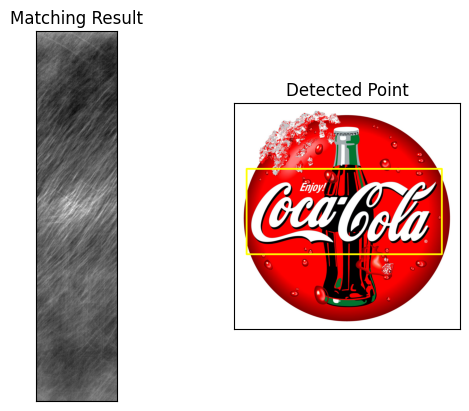

In [11]:
match_template_single(img_list[0],templates[24])

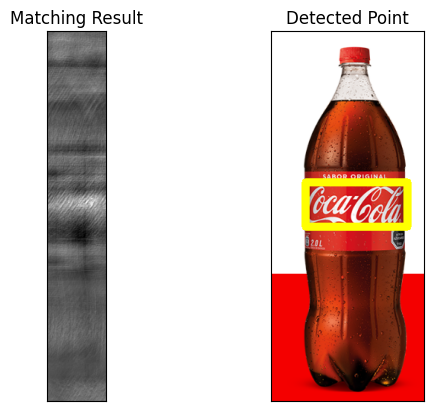

In [12]:
match_template_single(img_list[1],templates[2])

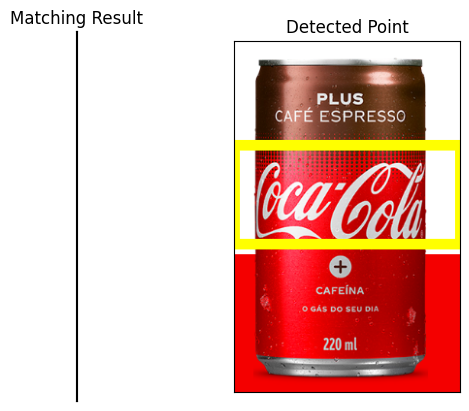

In [13]:
match_template_single(img_list[2],templates[4])

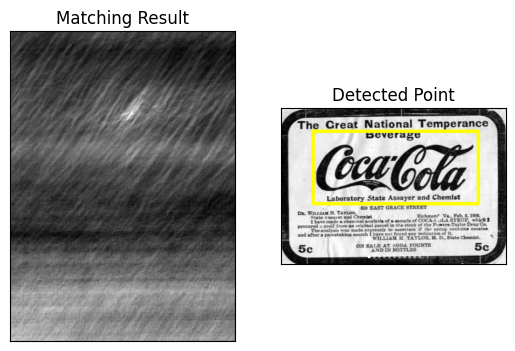

In [14]:
match_template_single(img_list[4],templates[10])

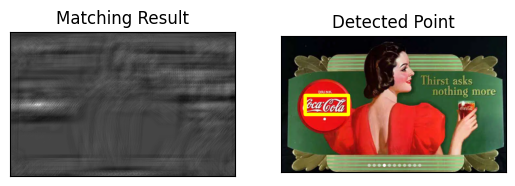

In [15]:
match_template_single(img_list[5],templates[2])

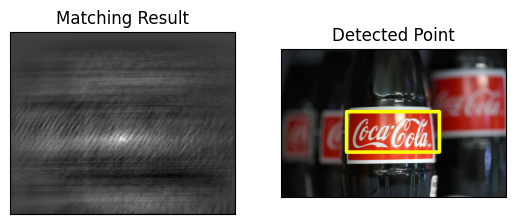

In [16]:
match_template_single(img_list[6],templates[5])